In [558]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


In [812]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
sns.set()
from fancyimpute import IterativeImputer as MICE
import xgboost as xgb

In [813]:
#read dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
'''
Data Dictionary

Survived:0=No, 1=yes
Pclass:TicketClass 1=1stClass, 2=2ndClass,3=3rdClass
SibSp: number of Siblings/spouses aboard titanic
Parch: number of parents/childrens aboard titanic
ticket: Ticket number
Cabin: Cabin number
Embarked: Port of Embarkation C=Cherbourg, Q=Queenstown, S=Southampton
'''

'\nData Dictionary\n\nSurvived:0=No, 1=yes\nPclass:TicketClass 1=1stClass, 2=2ndClass,3=3rdClass\nSibSp: number of Siblings/spouses aboard titanic\nParch: number of parents/childrens aboard titanic\nticket: Ticket number\nCabin: Cabin number\nEmbarked: Port of Embarkation C=Cherbourg, Q=Queenstown, S=Southampton\n'

In [131]:
percent_missing=train.isnull().sum()*100/len(train)
missing_values_pc=pd.DataFrame({'column_name':train.columns, 'percent_missing':percent_missing})
missing_values_pc

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


In [21]:
# we start by EDA
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
print("train shape is", train.shape)

train shape is (891, 12)


In [10]:
print("test shape is", test.shape)

test shape is (418, 11)


In [11]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
#statistics of data
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mitchell, Mr. Henry Michael",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


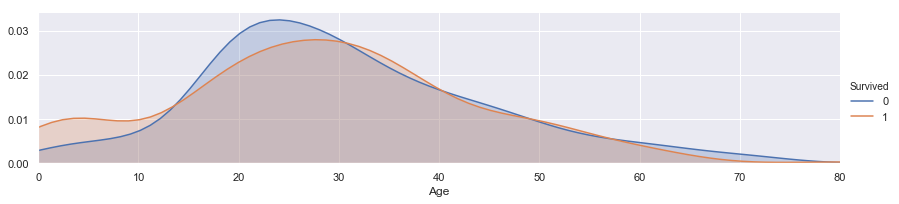

(10, 50)

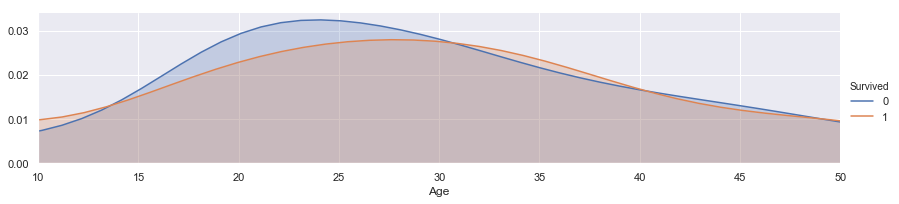

In [182]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(10,50)

In [25]:
#distribution of data
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mitchell, Mr. Henry Michael",male,1601,G6,S
freq,1,577,7,4,644


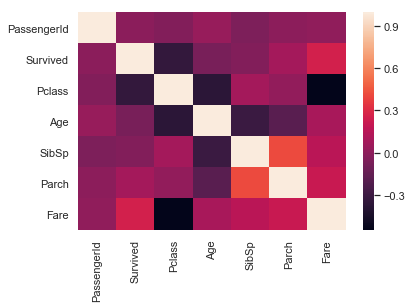

In [26]:
# Data visualization
sns.heatmap(train.corr())

In [27]:
#from heatmap we can see that survived has negative correlation with Pclass
corr_mat=train.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [ ]:
#Lets create some barcharts for categorical variables

In [132]:
def bar_chart(variable):
    survived=train[train['Survived']==1][variable].value_counts()
    dead=train[train['Survived']==0][variable].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','dead']
    df.plot(kind='bar',stacked=True,figsize=(5,3))

In [19]:
train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

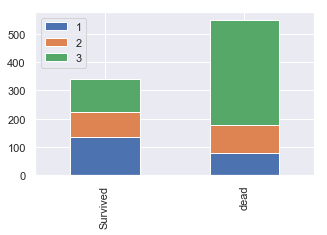

In [29]:
bar_chart('Pclass') 

In [33]:
#first class are more likely survived more than other classes and 
#3rd class are more likely dead than other classes

In [51]:
train.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

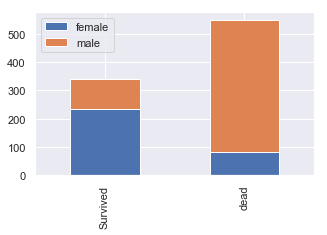

In [30]:
bar_chart('Sex')

In [ ]:
#males are more likely dead compared to women

In [53]:
train.groupby('SibSp').mean()['Survived']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

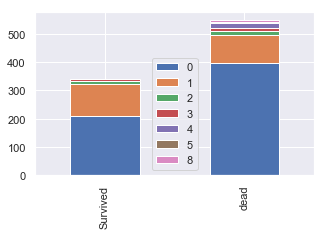

In [31]:
bar_chart('SibSp')

In [ ]:
#a person with more siblings are more likely survived

In [133]:
train.groupby('Parch').mean()['Survived'].sort_values(ascending=False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

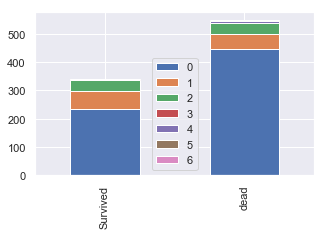

In [32]:
bar_chart('Parch')

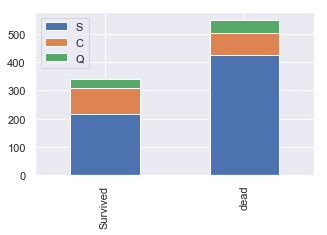

In [34]:
bar_chart('Embarked')

/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


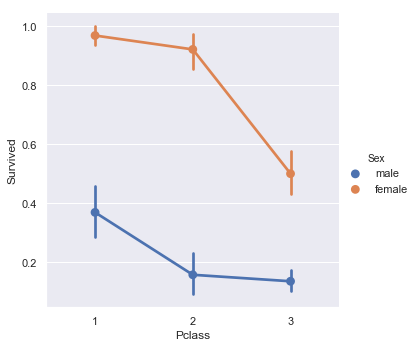

In [299]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train,order=[1,2,3])

In [ ]:
# a person aboarded from S are more likely dead
#a person aboarded from C are slight likely survived

In [42]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

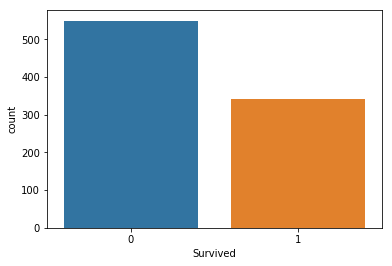

In [37]:
sns.countplot(train['Survived'])

In [ ]:
#Degree of imbalance	Proportion of Minority Class
#Mild					20-40% of the data set
#Moderate				1-20% of the data set
#Extreme				<1% of the data set

In [814]:
test["Survived"]=""
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [ ]:
#In real-life scenario, where an index of a dataset generally has no correlation with the target variable
#Feature engineering


In [60]:
train['Name'].str.extract(' ([A-Za-z]+)\.')[1:25]

,0
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs
10,Miss


In [242]:
train.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [50]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
0,3,0,2.0,0,0,0.0,NaN,2,,0.0
1,3,1,3.0,1,0,0.0,NaN,0,,2.0
2,2,0,3.0,0,0,1.0,NaN,2,,0.0
3,3,0,2.0,0,0,1.0,NaN,0,,0.0
4,3,1,1.0,1,1,1.0,NaN,0,,2.0


In [815]:
train_test_fillna=[train,test]

for data in train_test_fillna:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    #data['Age'].fillna(data.groupby("Title")['Age'].transform("median"),inplace=True)
    data['Embarked'].fillna('S',inplace=True)
    data['Fare'].fillna(data.groupby("Pclass")['Fare'].transform("median"),inplace=True)

In [816]:
mean=train['Age'].mean()
std=train['Age'].std()

r=np.random.randint(mean-std,mean+std)
train['Age'].fillna(r,inplace=True)

In [817]:
mean_test=test['Age'].mean()
std_test=test['Age'].std()

r_test=np.random.randint(mean_test-std_test,mean_test+std_test)
test['Age'].fillna(r_test,inplace=True)

In [818]:
embark=pd.get_dummies(train['Embarked'])
sex=pd.get_dummies(train['Sex'])

train=train.join(embark)
train=train.join(sex)

In [819]:
test_embark=pd.get_dummies(test['Embarked'])
test_sex=pd.get_dummies(test['Sex'])

test=test.join(test_embark)
test=test.join(test_sex)

In [704]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,0,1


In [705]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,Mr,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,Mrs,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,Mr,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,Mr,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,Mrs,0,0,1,1,0


In [820]:

#map titles to data before removing names 
train_test=[train,test]

title_map={'Mr':10, 'Miss':11, 'Mrs':12 , 'Master':13, 'Dr':13, 'Rev':13, 'Col':13, 'Mlle':13,
           'Major':13,'Ms':13, 'Don':13, 'Mme':13, 'Sir':13, 'Jonkheer':13,' lady':13, 'Capt':13,'Countess':13}

for dataset in train_test:
    dataset['Title']=dataset['Title'].map(title_map) 
    
    bins = [0, 8, 16, 32, 60]
    names_fare = ['+2', '2-8', '8-16', '16-32', '32+']
    d = dict(enumerate(names_fare , 1))
    dataset['FareRange'] = np.vectorize(d.get)(np.digitize(dataset['Fare'],bins))
    
    bins = [0, 2, 16, 26, 35, 62,]
    names_age = ['+3', '2-18', '18-35', '35-65', '65-80','80+']
    d = dict(enumerate(names_age, 1))
    dataset['AgeRange'] = np.vectorize(d.get)(np.digitize(dataset['Age'],bins))
      

In [821]:
title=pd.get_dummies(train['Title'])
train=train.join(title)

age=pd.get_dummies(train['AgeRange'])
train=train.join(age)

fares=pd.get_dummies(train['FareRange'])
train=train.join(fares)

In [822]:
title_test=pd.get_dummies(test['Title'])
test=test.join(title_test)

age_test=pd.get_dummies(test['AgeRange'])
test=test.join(age_test)

fares_test=pd.get_dummies(test['FareRange'])
test=test.join(fares_test)

In [823]:
#drop extra columns
train.drop(['PassengerId','Fare','Age','AgeRange','FareRange','Ticket','Sex','Title','Name','Embarked','Cabin'],axis=1,inplace=True)
test.drop(['Fare','Age','AgeRange','FareRange','Ticket','Sex','Title','Name','Embarked','Cabin'],axis=1,inplace=True)

In [737]:
train.columns

Index(['Survived',   'Pclass',    'SibSp',    'Parch',        'C',        'Q',
              'S',   'female',     'male',       10.0,       11.0,       12.0,
             13.0,       '+3',    '18-35',     '2-18',    '35-65',    '65-80',
            '80+',       '+2',    '16-32',      '2-8',      '32+',     '8-16'],
      dtype='object')

In [738]:
train.head()

,Survived,Pclass,SibSp,Parch,C,Q,S,female,male,10.0,...,18-35,2-18,35-65,65-80,80+,+2,16-32,2-8,32+,8-16
0,0,3,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,0
1,1,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,3,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0


In [712]:
test.head()

,Pclass,SibSp,Parch,Survived,C,Q,S,female,male,10.0,...,18-35,2-18,35-65,65-80,80+,+2,16-32,2-8,32+,8-16
0,3,0,0,,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
1,3,1,0,,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2,0,0,,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
3,3,0,0,,0,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,3,1,1,,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [824]:
X_train=train.drop("Survived",axis=1)
y_train=train['Survived']
X_test=test.drop("Survived",axis=1)
y_test=test['Survived']

In [330]:
#imputed_train=MICE().fit_transform(X_train)
#imputed_test=MICE().fit_transform(X_test)

In [673]:
#Basic Classifiers
Logreg=LogisticRegression(random_state=101,solver='lbfgs',max_iter=500)
print("CV score", cross_val_score(Logreg,X_train,y_train,cv=3).mean())

CV score 0.8069584736251403


In [674]:
knn=KNeighborsClassifier(n_neighbors=3, leaf_size=1000,p=1)
print("CV score", cross_val_score(knn,X_train,y_train,cv=3).mean())

CV score 0.8047138047138048


In [675]:
svc=SVC(gamma='auto',random_state=101,kernel='rbf')
print("CV score", cross_val_score(svc,X_train,y_train,cv=3).mean())

CV score 0.8215488215488215


In [676]:
NN=MLPClassifier(hidden_layer_sizes=[14,25],max_iter=2000)
print("CV score", cross_val_score(NN,X_train,y_train,cv=3).mean())

CV score 0.8024691358024691


In [677]:
dt=DecisionTreeClassifier(random_state=101)
print("CV score", cross_val_score(dt,X_train,y_train,cv=3).mean())

CV score 0.8047138047138048


In [678]:
#Ensemble Classifiers
rf=RandomForestClassifier(n_estimators=100, random_state=101)
print("CV score", cross_val_score(rf,X_train,y_train,cv=3).mean())

CV score 0.8136924803591471


In [679]:
xgboost=xgb.XGBClassifier(random_state=12)
print("CV score", cross_val_score(xgboost,X_train,y_train,cv=3).mean())

CV score 0.8125701459034792


In [659]:
#Tunning classifiers
svcGrid=SVC(gamma='auto',random_state=101)
svc_params={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01], 'kernel':['linear','rbf']}

In [291]:
rf_grid=RandomForestClassifier(random_state=101,n_jobs=-1)
rf_params={'bootstrap':[True,False],'max_depth':[10,30,50,100,None], 
           'max_features':['auto','sqrt'], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4],
            'n_estimators':[100,500,750,1500]}

In [680]:
xgb_grid=xgb.XGBClassifier(random_state=42)
xgb_param={'bootstrap':[True,False],'learning_rate':[0.1,0.01,0.001],'max_depth':[10,30,50,100,None], 
           'max_features':['auto','sqrt'], 'min_samples_split':[2,8,10,20,40], 'min_samples_leaf':[1,3,5,7],
            'n_estimators':[100,250,550,1000],'subsample':[0.7,0.9,1]}

In [684]:
grid_search=GridSearchCV(estimator=xgb_grid, param_grid=xgb_param, cv=3, scoring='accuracy',n_jobs=-1,verbose=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[22:51:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'bootstrap': True,
 'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1}

In [685]:
best_grid=grid_search.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, max_features='auto', min_child_weight=1,
              min_samples_leaf=1, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [686]:
print("CV score", cross_val_score(best_grid,X_train,y_train,cv=3).mean())

[22:52:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:52:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:52:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This ma

In [687]:
#feature importance for random forest
#best_grid.feature_importance

In [791]:
prediction=best_grid.predict(X_test)

In [827]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Survived,C,Q,S,female,male,...,18-35,2-18,35-65,65-80,80+,+2,16-32,2-8,32+,8-16
0,892,3,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,893,3,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
2,894,2,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,895,3,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,896,3,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [825]:
test['Survived']=prediction

In [826]:
submission=pd.DataFrame(test['PassengerId'],test['Survived'])
submission.to_csv("Submissions.csv")